In [1]:
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from konlpy.tag import Komoran

In [2]:
dataset = pd.read_csv('./data/articles_essential_refined.csv', encoding='utf-8')
dataset

,title,author,year,vol,no,keyword,abstract
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"김 영 신 , 김동민",2019,21,21,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,박환영,2019,21,21,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"이 혜 민 , 소혜진",2019,21,21,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"최혜진 , 황은영",2019,21,21,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"김동민 , 정 종 현 , 소라엘 , 최지엘 , 김 영 신",2019,21,21,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...
...,...,...,...,...,...,...,...
195,멜로디억양치료(Melodic Intonation Therapy)가 비유창성 실어증환...,이난복,2000,2,2,MV,본 연구는 멜로디억양치료(Melodic Intonation Therapy: MIT)...
196,음악치료에 대한 정신과 영역 전문인들의 인식도 조사,김경숙,1999,1,1,MV,본 연구의 목적은 국내 정신과 관련 전문인들의 음악치료에 대한 인식과 태도를 조사하...
197,"""Journal of Music Therapy""(1987~1998)에 수록된 논문의...",김은주,1999,1,1,MV,본 연구는 19897년부터 1998년까지의 Journal of Music Thera...
198,음악활동이 정신지체아동의 부적응행동 감소에 미치는 효과,성인영,1999,1,1,MV,본 연구의 목적은 정신지체아동의 부적응행동을 감소시켜 효과적인 학습환경과 집단생활을...


In [3]:
# konlpy
original_nouns = []
target_nouns = []

komoran = Komoran(userdic='./data/dictionary_pos.tsv')

sr_abstract = dataset['abstract']
for idx in sr_abstract.index:
    lst_nouns = komoran.nouns(sr_abstract.loc[idx])
    for n in lst_nouns:
        original_nouns.append(n)

counter = Counter(original_nouns)
for w, f in counter.most_common():
    if len(w) >= 2 and f >= 50:
        target_nouns.append(w)
len(target_nouns)

85

In [4]:
df_add_noun = dataset.copy()
df_add_noun['noun'] = ""

sr_abstract = df_add_noun['abstract']
for idx in sr_abstract.index:
    lst_nouns = komoran.nouns(sr_abstract.loc[idx])
    nouns = []
    for n in lst_nouns:
        if n in target_nouns:
            nouns.append(n)
    df_add_noun['noun'].loc[idx] = nouns
df_add_noun

/Users/dhsong/Workspaces/Music Therapy NLP Project/Pycharm Project/venv/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,title,author,year,vol,no,keyword,abstract,noun
0,예술치료사 자기효능감 척도 개발 및 타당화 연구,"김 영 신 , 김동민",2019,21,21,"예술치료, 자기효능감, 예술치료사 자기효능감 척도, 타당화",본 연구에서는 예술치료사의 전문적 자기효능감을 측정할 수 있는 예술치료사 자기효능감...,"[연구, 측정, 척도, 개발, 활동, 측정, 척도, 척도, 문항, 대상, 요인, 분..."
1,델파이 방법을 통한 국내 재활음악치료 발전방안 연구,박환영,2019,21,21,"재활음악치료, 발전방안, 델파이","본 연구는 델파이 방법을 통하여 국내 재활분야에서 음악치료의 현재 위치를 인식하고,...","[연구, 방법, 음악치료, 인식, 음악치료, 임상, 대상, 조사, 실시, 결과, 다..."
2,음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰에 대한 자문화기술지,"이 혜 민 , 소혜진",2019,21,21,"음악치료사, 치료사 훈련과정, 열등감, 자문화기술지",본 연구는 한 개인 음악치료사의 훈련과정에서 경험한 열등감 인식과 통찰을 고찰하는 ...,"[연구, 개인, 음악치료사, 과정, 경험, 인식, 목적, 연구, 연구, 대상자, 경..."
3,호스피스ㆍ완화의료 환자를 대상으로 한 국내ㆍ외 음악치료 연구 메타분석,"최혜진 , 황은영",2019,21,21,"호스피스ㆍ완화의료, 음악치료, 메타분석",본 연구는 메타분석을 통해 호스피스ㆍ완화의료 환자를 대상으로 한 음악치료의 전체효과...,"[연구, 환자, 대상, 음악치료, 효과, 확인, 환자, 대상, 음악치료, 중재, 연..."
4,수퍼바이지가 지각하는 음악치료 전문성과 수퍼비전 교육요구에 대한 합의적 질적연구,"김동민 , 정 종 현 , 소라엘 , 최지엘 , 김 영 신",2019,21,21,"음악치료사, 발달, 전문성, 수퍼비전, 수퍼바이지, 합의적 질적연구",본 연구는 수퍼바이지가 지각하는 음악치료 전문성 요인을 탐색하고 이를 발달시키기 위...,"[연구, 음악치료, 요인, 발달, 교육, 경험, 음악치료사, 자료, 방법, 사용, ..."
...,...,...,...,...,...,...,...,...
195,멜로디억양치료(Melodic Intonation Therapy)가 비유창성 실어증환...,이난복,2000,2,2,MV,본 연구는 멜로디억양치료(Melodic Intonation Therapy: MIT)...,"[연구, 치료, 환자, 효과, 평균, 연구, 대상, 검사, 도구, 검사, 결과, 환..."
196,음악치료에 대한 정신과 영역 전문인들의 인식도 조사,김경숙,1999,1,1,MV,본 연구의 목적은 국내 정신과 관련 전문인들의 음악치료에 대한 인식과 태도를 조사하...,"[연구, 목적, 정신, 관련, 음악치료, 인식, 조사, 음악치료, 연구, 대상, 정..."
197,"""Journal of Music Therapy""(1987~1998)에 수록된 논문의...",김은주,1999,1,1,MV,본 연구는 19897년부터 1998년까지의 Journal of Music Thera...,"[연구, 내용, 분석, 음악치료, 연구, 유형, 변화, 연구, 연구, 내용, 분석,..."
198,음악활동이 정신지체아동의 부적응행동 감소에 미치는 효과,성인영,1999,1,1,MV,본 연구의 목적은 정신지체아동의 부적응행동을 감소시켜 효과적인 학습환경과 집단생활을...,"[연구, 목적, 정신, 아동, 행동, 감소, 효과, 음악활동, 효과, 연구, 사용,..."


In [5]:
# abstract tagging
noun_list = df_add_noun['noun'].to_list()
dictionary = corpora.Dictionary(noun_list)
corpus = [dictionary.doc2bow(n) for n in noun_list]

In [6]:
perplexity_values = []
coherence_values = []

for i in range(2, 21):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=noun_list, dictionary=dictionary, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

-4.1815348433337585
-4.147092800173981
-4.20690135820828
-4.187137478273847
-4.238764220340818
-4.222274390066596
-4.249345189911625
-4.2330667395709805
-4.2054150122080936
-4.237392929656605
-4.235363965556915
-4.274773526399377
-4.304728139564467
-4.273193850124575
-4.303747342247206
-4.283094850152783
-4.3226730865458265
-4.332314036688849
-4.348155870237424


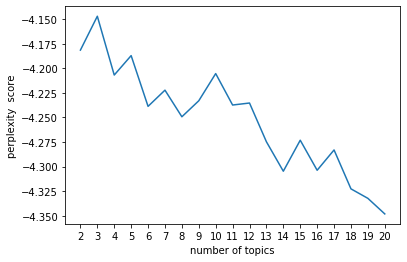

In [10]:
for value in perplexity_values:
    print(value)

x = range(2, 21)
plt.plot(x, perplexity_values)
plt.xticks(range(2, 21))
plt.xlabel('number of topics')
plt.ylabel('perplexity  score')
plt.show()

0.4319337272874024
0.42288613776175393
0.3957018365951272
0.38628997665489423
0.4038584668773124
0.39132355304698047
0.40168775835409365
0.42068787428841536
0.4267909037262105
0.44527704201729884
0.42203899320941457
0.41027861762571766
0.3732118949349146
0.4250730736259103
0.39622395694115875
0.42367393739461945
0.3966406900764767
0.3927610755106012
0.4007645013250918


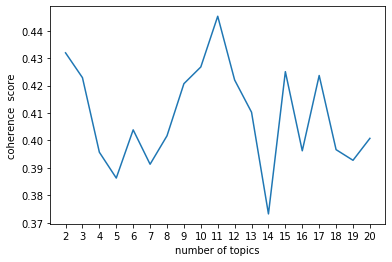

In [11]:
for value in coherence_values:
    print(value)

x = range(2, 21)
plt.plot(x, coherence_values)
plt.xticks(range(2, 21))
plt.xlabel('number of topics')
plt.ylabel('coherence  score')
plt.show()

In [12]:
num_topics = 11
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, iterations=500)
topics = ldamodel.print_topics(num_topics=num_topics)
for topic in topics:
    print(topic)

(0, '0.089*"환자" + 0.082*"결과" + 0.077*"음악치료" + 0.076*"연주" + 0.062*"음악" + 0.045*"경험" + 0.044*"분석" + 0.044*"치료" + 0.039*"확인" + 0.032*"연구"')
(1, '0.069*"집단" + 0.055*"노래" + 0.055*"선호" + 0.053*"차이" + 0.048*"연구" + 0.047*"정서" + 0.036*"결과" + 0.034*"반응" + 0.026*"음악" + 0.025*"유아"')
(2, '0.108*"연구" + 0.050*"분석" + 0.038*"그룹" + 0.034*"결과" + 0.030*"문항" + 0.030*"실험" + 0.028*"활동" + 0.028*"음악치료" + 0.024*"통제" + 0.024*"방법"')
(3, '0.101*"집단" + 0.058*"활동" + 0.058*"실험" + 0.056*"연구" + 0.040*"통제" + 0.030*"결과" + 0.026*"노래" + 0.026*"점수" + 0.025*"음악" + 0.023*"유의미"')
(4, '0.058*"집단" + 0.058*"연구" + 0.049*"음악치료" + 0.038*"음악" + 0.032*"아동" + 0.031*"결과" + 0.031*"문항" + 0.030*"분석" + 0.028*"치료" + 0.026*"검증"')
(5, '0.099*"연구" + 0.079*"음악치료" + 0.044*"집단" + 0.037*"결과" + 0.033*"제시" + 0.027*"행동" + 0.026*"치료" + 0.024*"효과" + 0.023*"음악" + 0.022*"장애"')
(6, '0.101*"음악" + 0.069*"연구" + 0.053*"음악치료" + 0.041*"분석" + 0.041*"경험" + 0.039*"결과" + 0.025*"자극" + 0.025*"정서" + 0.022*"대상" + 0.022*"차이"')
(7, '0.111*"연구" + 0.052*"음악치료사" + 0.051*"영향"

In [13]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

/Users/dhsong/Workspaces/Music Therapy NLP Project/Pycharm Project/venv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.046870 -0.005484       1        1  15.942346
3     -0.137752  0.015970       2        1  12.655525
7      0.084017 -0.003424       3        1  11.285483
9     -0.078074  0.034662       4        1   9.992722
6      0.050803 -0.068276       5        1   9.494066
4     -0.010450  0.006187       6        1   8.982614
1     -0.072285 -0.116053       7        1   8.283545
10    -0.021265  0.047442       8        1   8.025322
5     -0.003583  0.026294       9        1   7.974978
2     -0.022320  0.046062      10        1   5.237036
0      0.164040  0.016620      11        1   2.126363, topic_info=   Category        Freq  Term       Total  loglift  logprob
26  Default  461.000000  음악치료  461.000000  30.0000  30.0000
41  Default  311.000000    음악  311.000000  29.0000  29.0000
44  Default  107.000000    환자  107.000000  28.0000  28.0000
56  Default  439.000000    집단  439.000000  27.0000  27.0000
72  Default   99.000000    연주   99.000000  26.0000  26.0000
..      ...         ...   ...         ...      ...      ...
20  Topic11    2.960305    활동  182.500824  -0.2707  -4.2959
25  Topic11    1.566270    영역  115.295296  -0.4480  -4.9325
11  Topic11    6.931669    연구  768.153992  -0.8571  -3.4450
57  Topic11    2.372927    차이  203.408508  -0.6003  -4.5170
40  Topic11    1.644520    영향  197.162567  -0.9358  -4.8837

[449 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
50        1  0.097719    감소
50        2  0.263842    감소
50        3  0.078175    감소
50        4  0.244298    감소
50        6  0.019544    감소
...     ...       ...   ...
45        1  0.662719  효과크기
45        4  0.045705  효과크기
45        5  0.182819  효과크기
45        9  0.079983  효과크기
45       10  0.034279  효과크기

[817 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 8, 10, 7, 5, 2, 11, 6, 3, 1])